In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
image_path = "D:/riconoscimento_numeri/imgs/mini/cuts/cut_27.png/0.jpg"

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

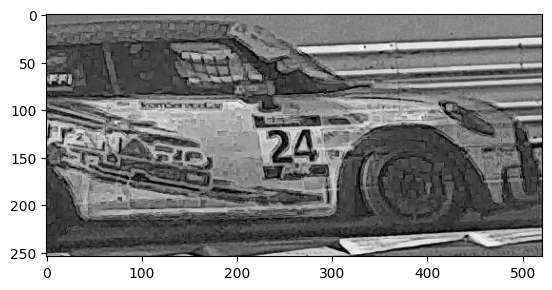

In [3]:
plt.imshow(image, cmap='gray')

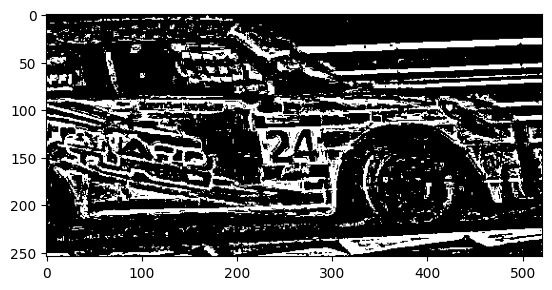

In [14]:
blockSize = 45
c = -21

thres = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize, c)

plt.imshow(thres, cmap='gray')

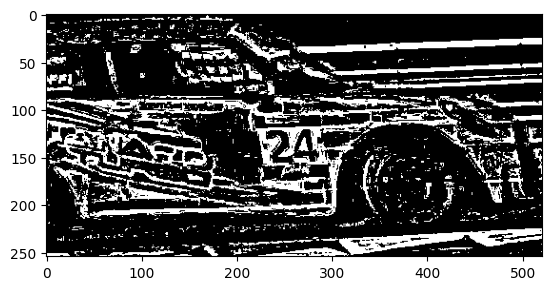

In [41]:

color = cv2.cvtColor(thres, cv2.COLOR_GRAY2RGB)

contours, _ = cv2.findContours(thres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

new_contours = []

for contour in contours:
    epsilon = 0.06 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    x, y, w, h = cv2.boundingRect(approx)
    if w / h > 0.5 and w / h < 2 and len(contour) > 10 and w > 10 and h > 10:
        #color = cv2.rectangle(color, (x, y), (x+w, y+h), (255, 0, 0), 2)
        new_contours.append(approx)

#cv2.drawContours(color, new_contours, -1, (0, 255, 0), 2)
plt.imshow(color)

C:\Users\michi\AppData\Local\Temp\ipykernel_12396\2901171571.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


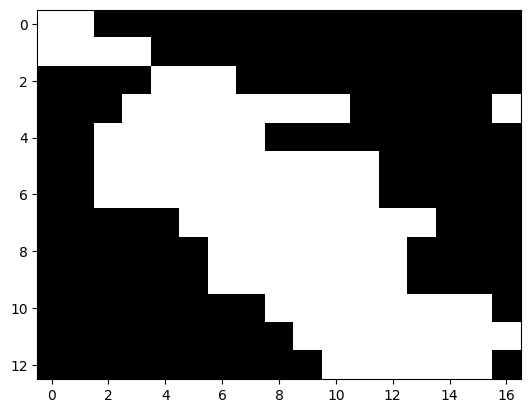

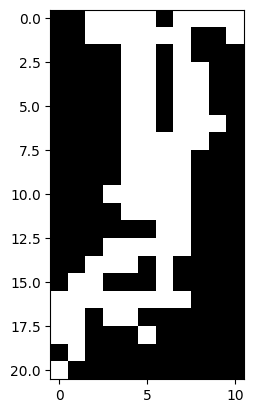

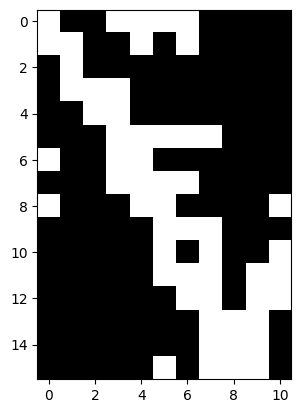

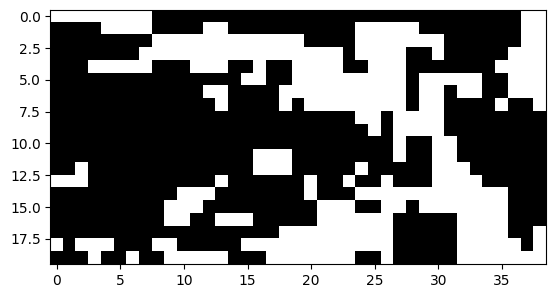

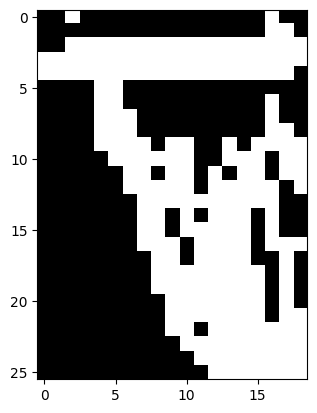

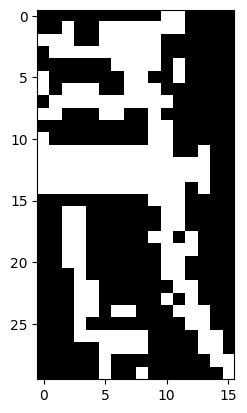

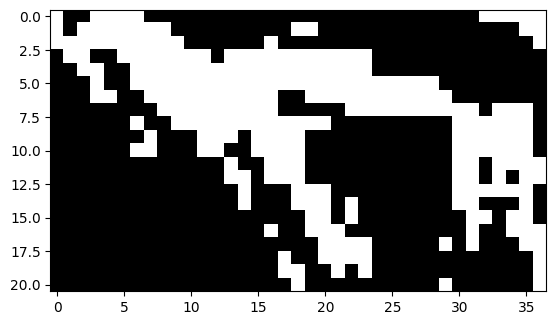

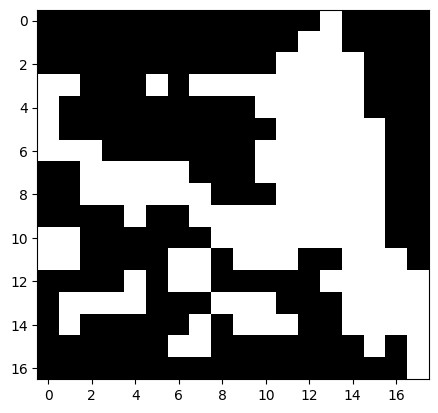

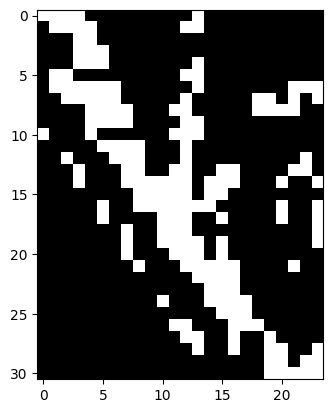

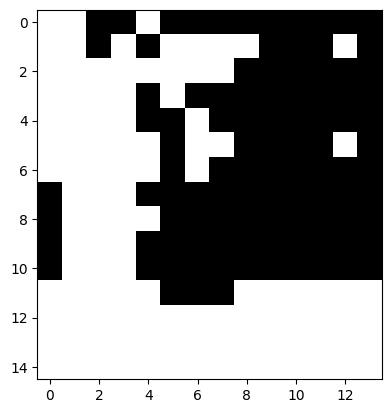

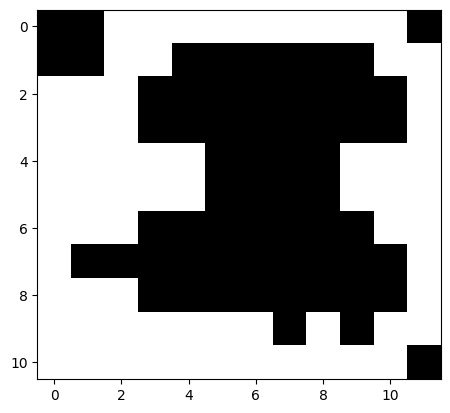

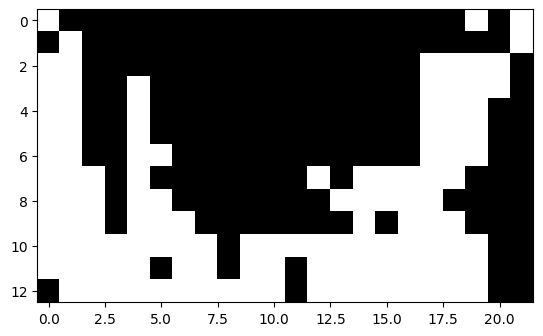

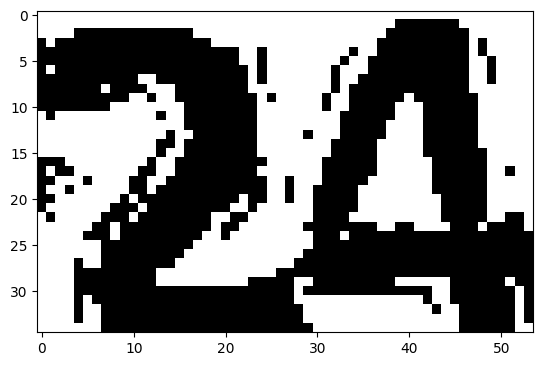

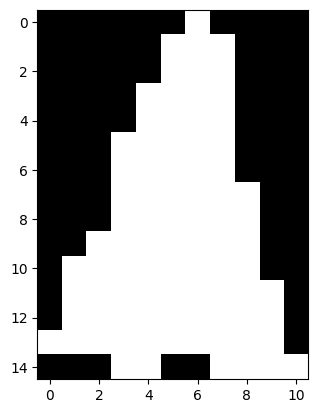

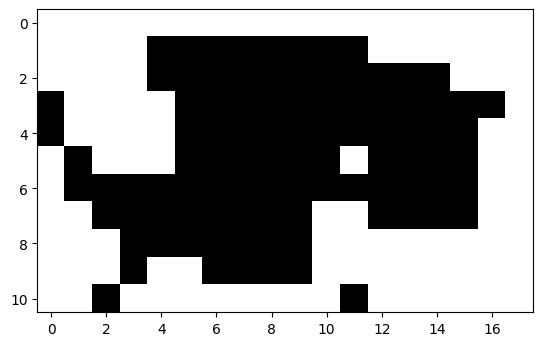

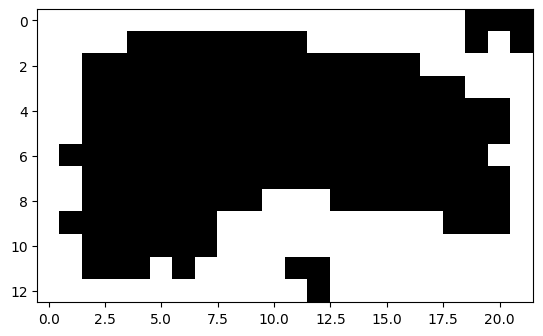

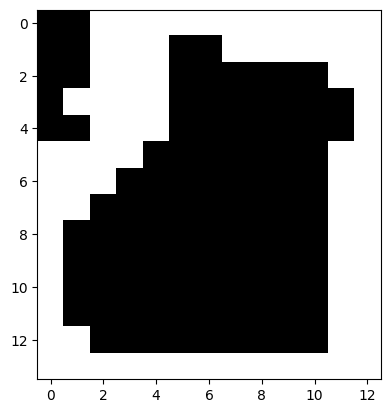

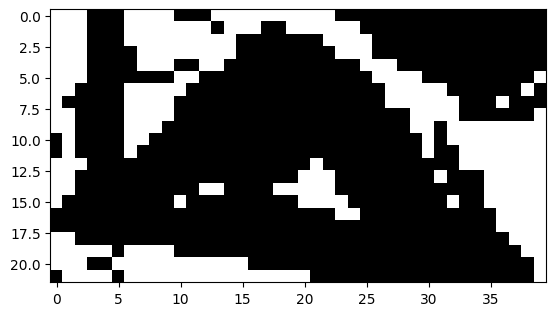

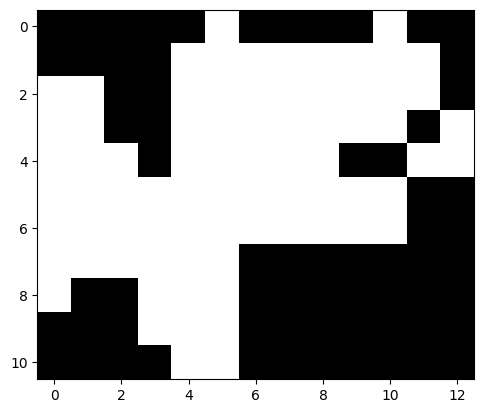

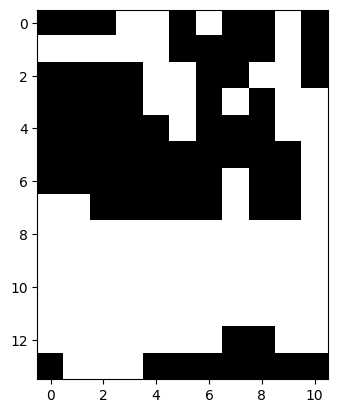

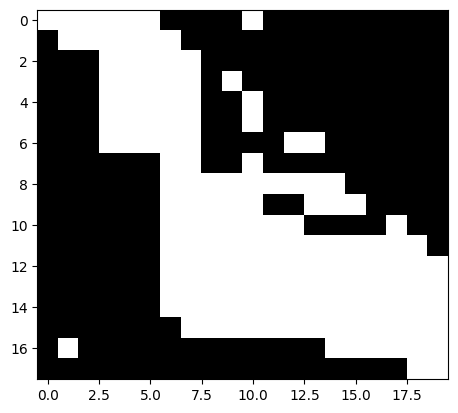

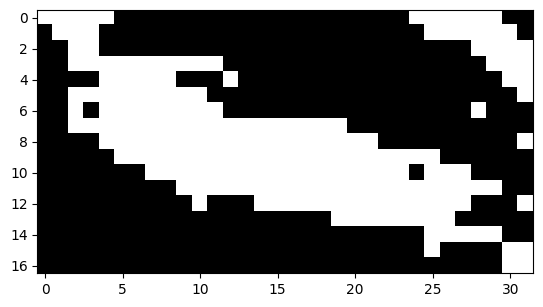

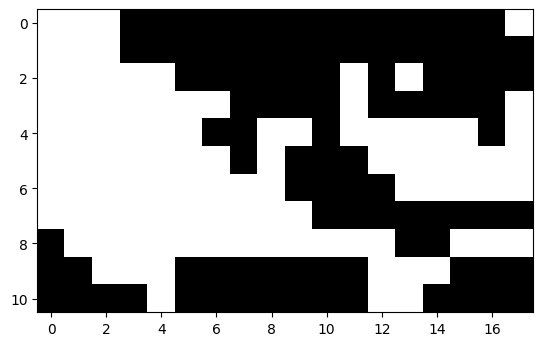

In [46]:
for i, contour in enumerate(new_contours):
    x, y, w, h = cv2.boundingRect(contour)
    plt.figure()
    plt.imshow(color[y:y+h, x:x+w])